In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def plot_clusters(clusters, xlim=None, ylim=None):
    if xlim is not None:
        plt.xlim(xlim[0],xlim[1])
    if ylim is not None:
        plt.ylim(ylim[0],ylim[1])

    for cluster in clusters:
        plt.scatter(cluster["x"], cluster["y"])
    plt.show()

In [ ]:
cluster_specs = [
    {"x": 50, "y": 110, "distance": 60},
    {"x": 110, "y": 100, "distance": 100},
    {"x": 90, "y": 200, "distance": 50},
    {"x": 130, "y": 40, "distance": 60},
    {"x": 220, "y": 165, "distance": 50}]

clusters_original = []
clusters_x = np.array([])
clusters_y = np.array([])

# Modified from - https://stackoverflow.com/a/54247969/3036367
for cluster in cluster_specs:
    cluster_size = random.randrange(10,160)
    x = np.random.uniform(cluster["x"], cluster["x"] + cluster["distance"], size=(cluster_size,))
    y = np.random.uniform(cluster["y"], cluster["y"] + cluster["distance"], size=(cluster_size,))
    #y = np.random.normal(cluster_centre[1], distance, size=(cluster_size,))
    
    clusters_original.append({"x": x,"y": y})
    clusters_x = np.concatenate((clusters_x, x))
    clusters_y = np.concatenate((clusters_y, y))

data = {"x": clusters_x, "y": clusters_y}

plot_clusters(clusters_original,
    (np.amin(data["x"])-10, np.amax(data["x"])+10),
    (np.amin(data["y"])-10, np.amax(data["y"])+10))


In [ ]:
plot_clusters([data],
    (np.amin(data["x"])-10, np.amax(data["x"])+10),
    (np.amin(data["y"])-10, np.amax(data["y"])+10))

In [26]:
def initialise_centroid(data):
    # The centroid could be anywhere but certainly will be within the dataset's min and max
    x_min = int(np.amin(data["x"]))
    x_max = int(np.amax(data["x"]))
    y_min = int(np.amin(data["y"]))
    y_max = int(np.amax(data["y"]))
    x = random.randrange(x_min, x_max)
    y = random.randrange(y_min, y_max)
    return {"x": x, "y": y}

def initialise_clusters(data, k):
    clusters = []
    for i in range(k):
        centroid = initialise_centroid(data)
        clusters.append({"x": [], "y": [], "centroid": centroid})
    return clusters
        
def wipe_clusters(clusters):
    for cluster in clusters:
        cluster["x"] = []
        cluster["y"] = []

def find_distance(point, centroid):
    # Pythagorus' theorem to get distance between two points
    distance_x = abs(point["x"] - centroid["x"])
    distance_y = abs(point["y"] - centroid["y"])
    sum_of_squares = pow(distance_x,2) + pow(distance_y,2)
    return pow(sum_of_squares, 1/2) 

def add_point_to_cluster(cluster, point):
    cluster["x"].append(point["x"])
    cluster["y"].append(point["y"])

def add_point_to_cluster_with_nearest_centroid(point, clusters):
    nearest_centroid_i = None
    nearest_distance = None
    for i, cluster in enumerate(clusters):
        distance = find_distance(point, cluster["centroid"])
        if nearest_distance is None or distance < nearest_distance:
            nearest_distance = distance
            nearest_centroid_i = i
    add_point_to_cluster(clusters[nearest_centroid_i], point)

def update_centroids(clusters):
    for cluster in clusters:
        total_x = 0
        total_y = 0
        for x, y in zip(cluster["x"], cluster["y"]):
            total_x += x
            total_y += y
        try:
            average_x = total_x / len(cluster["x"])
            average_y = total_y / len(cluster["y"])
        except ZeroDivisionError:
            continue
        cluster["centroid"]["x"] = average_x
        cluster["centroid"]["y"] = average_y
    
def k_means_cluster(data, k=2, target_epochs=50):
    clusters = initialise_clusters(data, k)
    for _ in range(target_epochs):
        wipe_clusters(clusters)
        for x, y in zip(data["x"], data["y"]):
            point = {"x": x, "y": y}
            add_point_to_cluster_with_nearest_centroid(point, clusters)
        update_centroids(clusters)
        plot_clusters(clusters,
            (np.amin(data["x"])-10, np.amax(data["x"])+10),
            (np.amin(data["y"])-10, np.amax(data["y"])+10))
    return clusters
    

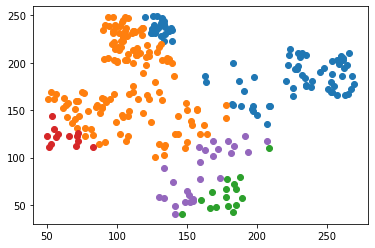

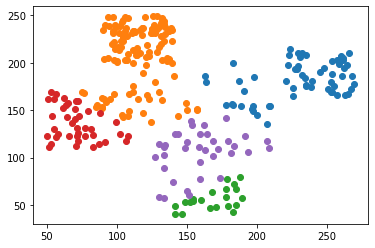

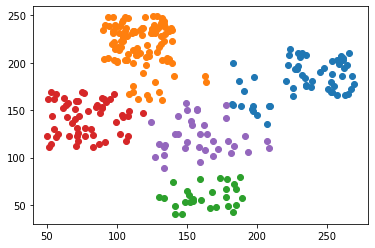

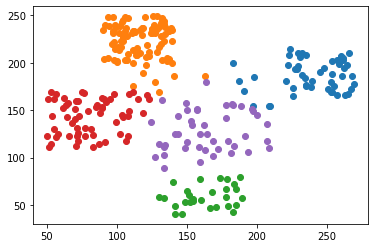

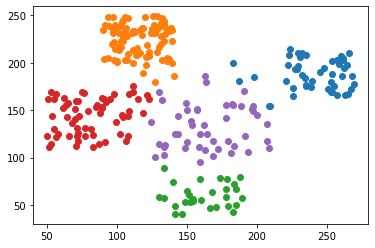

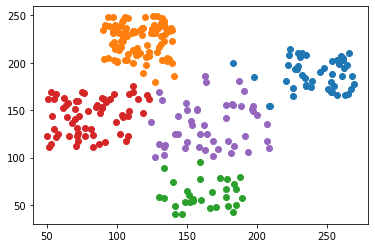

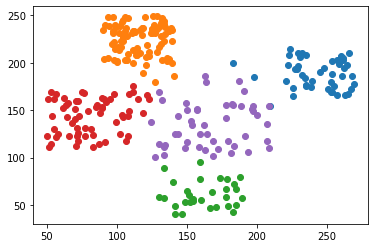

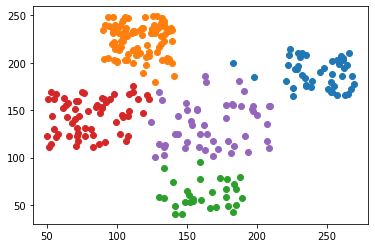

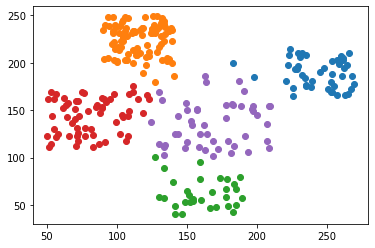

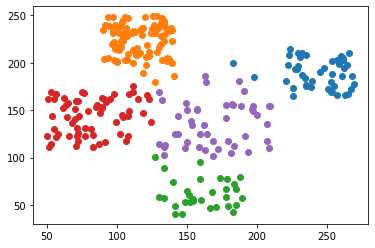

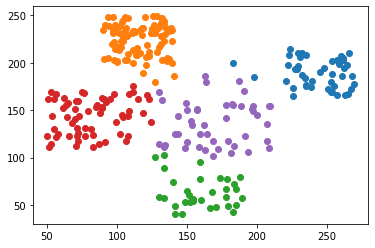

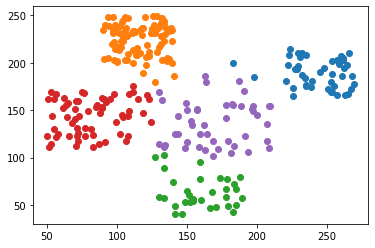

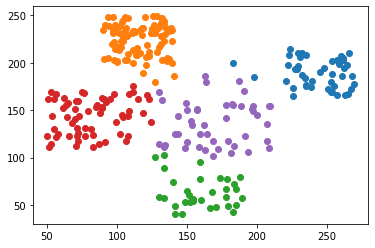

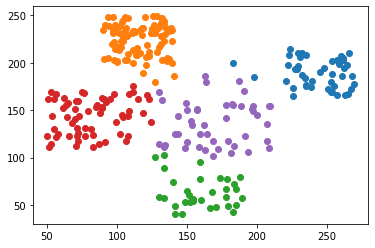

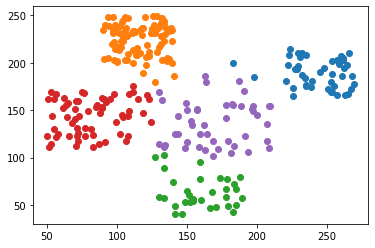

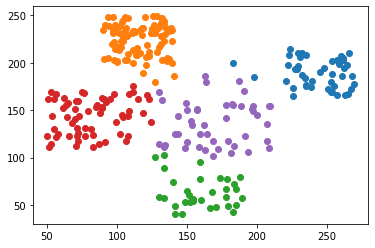

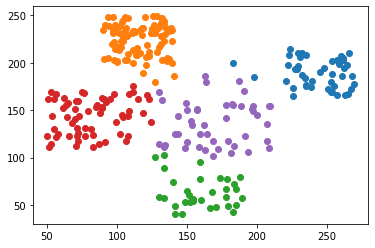

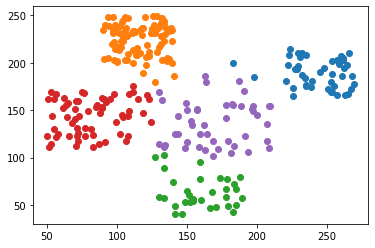

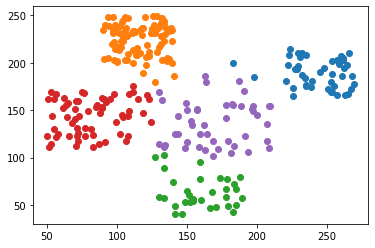

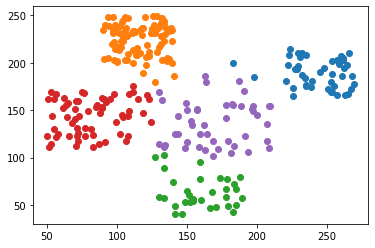

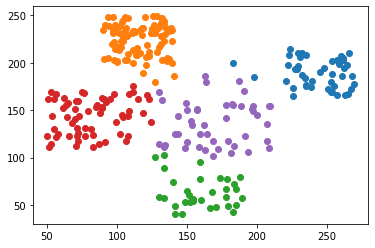

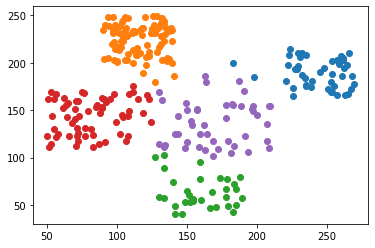

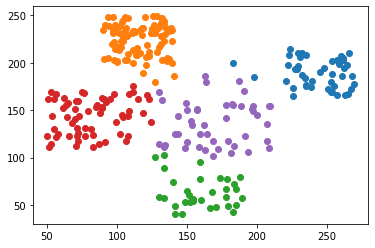

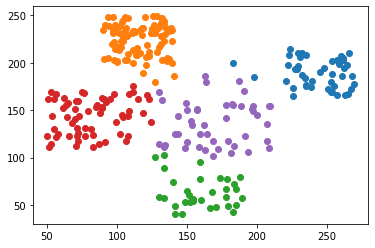

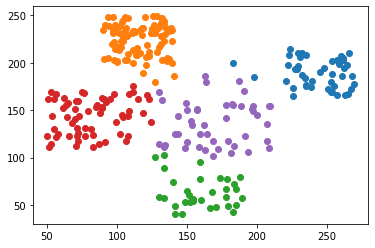

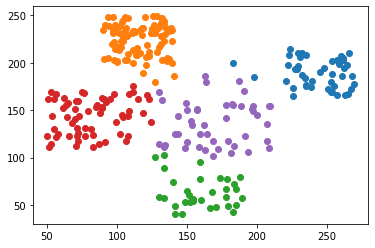

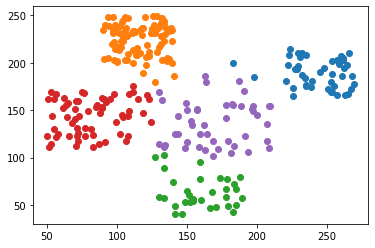

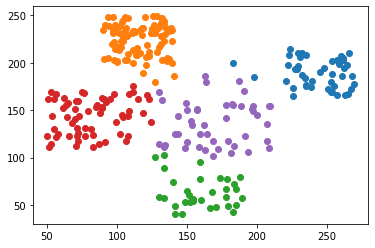

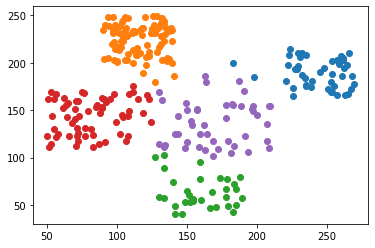

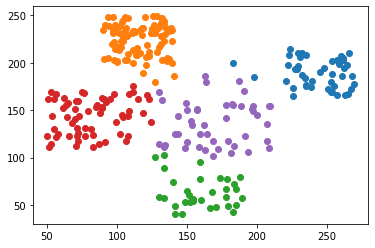

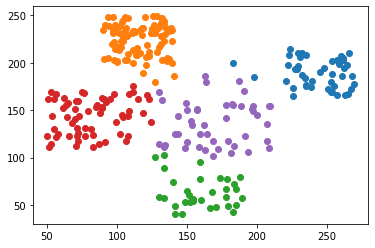

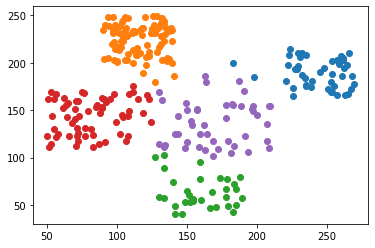

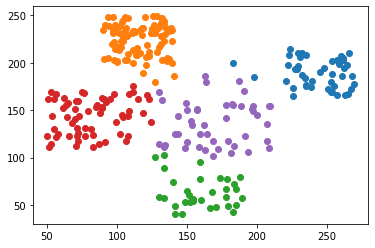

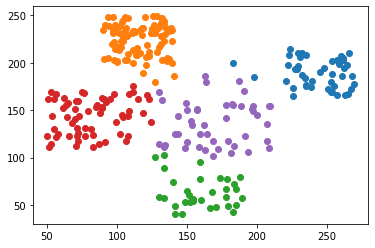

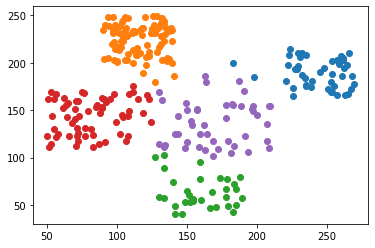

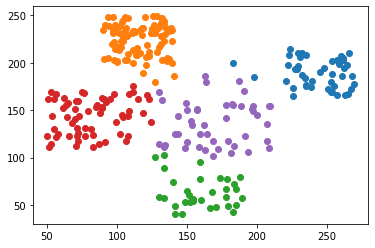

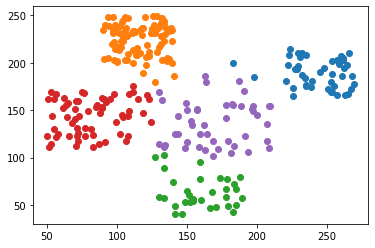

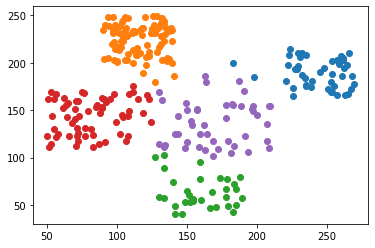

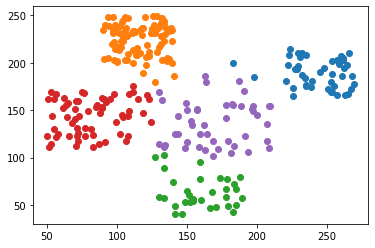

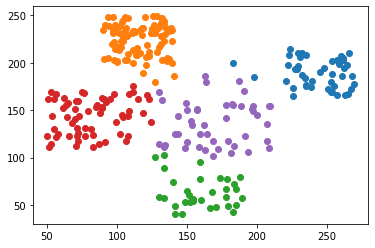

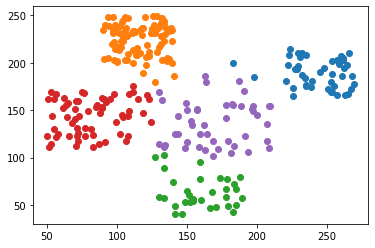

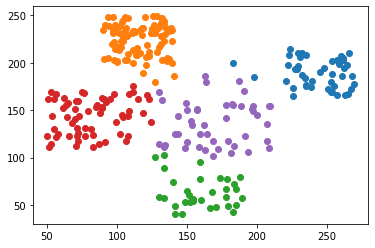

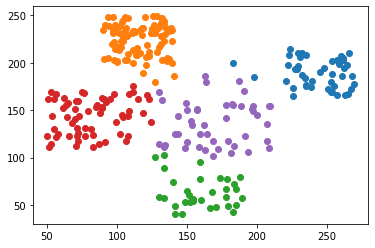

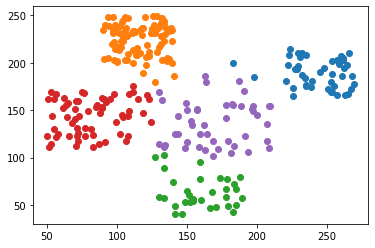

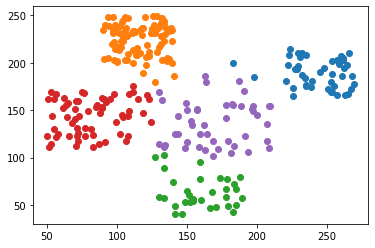

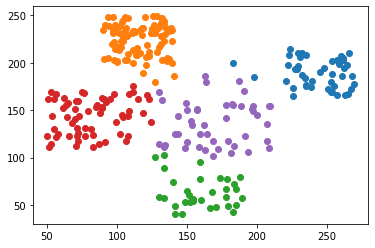

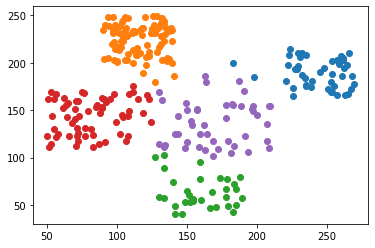

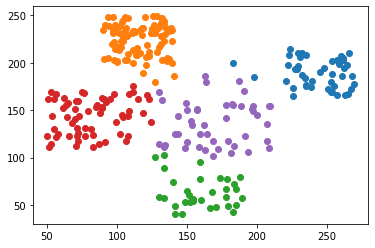

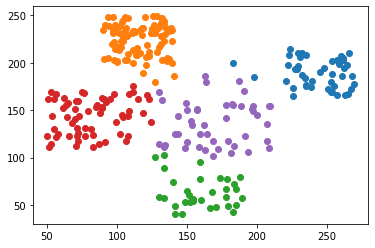

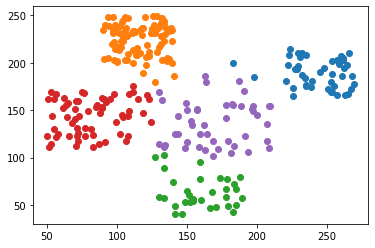

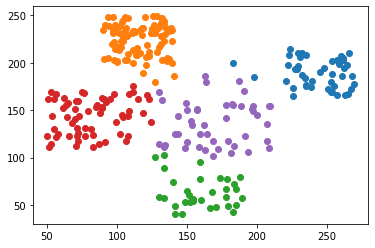

In [27]:
clusters = k_means_cluster(data, k=5)
plot_clusters(clusters,
    (np.amin(data["x"])-10, np.amax(data["x"])+10),
    (np.amin(data["y"])-10, np.amax(data["y"])+10))


0


RuntimeError: Requested MovieWriter (ffmpeg) not available

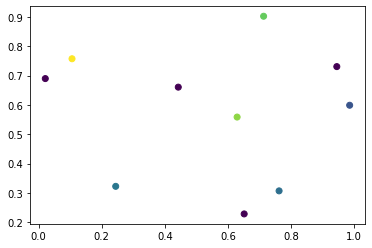

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

def main():
    numframes = 100
    numpoints = 10
    color_data = np.random.random((numframes, numpoints))
    x, y, c = np.random.random((3, numpoints))
    
    fig = plt.figure()
    scat = plt.scatter(x, y, c=c)

    ani = animation.FuncAnimation(fig, update_plot, frames=50, interval=200, blit=True,
                                  fargs=(color_data, scat))

    HTML(ani.to_html5_video())

def update_plot(i, data, scat):
    print(i)
    scat.set_array(data[i])
    return scat,

main()